żeby podczas nauki zapisać te najlepsze modele, które pojawiły się w toku uczenia
wskaźnikiem bycia najleepszym modelem jest val_loss na zbiorze walidacyjnym 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

save_best = ModelCheckpoint('./best_model.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

In [2]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "data_images/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


mamy prawie 8 milionów wag - dużo, więc długo się liczby
ale mamy tu już gotowy model, który można zaimplementować


In [3]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=(validation_dataset), callbacks=[es, save_best])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                                 
 dense (Dense)               (None, 512)               7873024   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 7,874,498
Trainable params: 7,874,498
Non-trainable params: 0
______________________________________________

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                                 
 dense (Dense)               (None, 512)               7873024   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 7,874,498
Trainable params: 7,874,498
Non-trainable params: 0
______________________________________________

jeden taki zapisany model to prawie 100mb
mamy aż 30 iteracji - także jakbysmy chcieli zapisać je sobie wszystkie, to byłoby okrutnie dużo pamięci (i byłoby bez sensu)

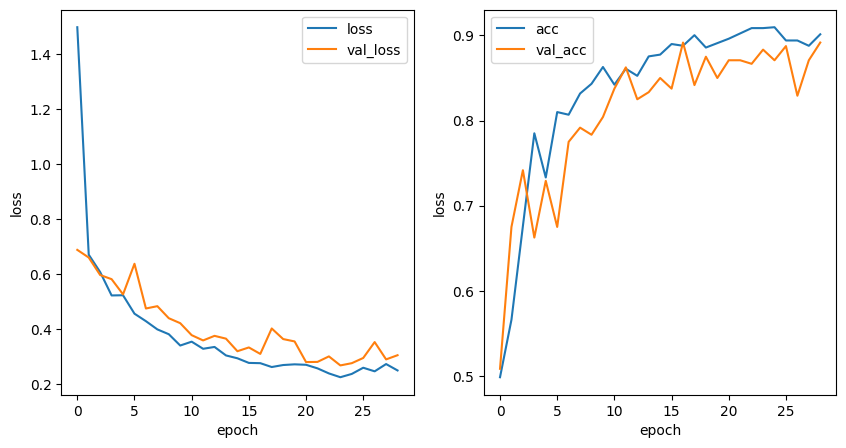

In [4]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()